# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>CHIMA, CALEB CHIDIMMA</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
data.sample(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2775,0,120,1,1,2.43,1,227.5,81,83.3,11.75,9.0
906,0,73,1,0,0.00,0,213.0,95,53.0,9.44,13.5
1353,0,123,1,0,0.24,0,114.4,91,40.4,10.83,11.0
1937,0,100,1,1,3.27,1,218.7,104,83.7,7.75,12.1
923,0,1,1,0,0.00,1,144.8,107,35.0,5.63,13.8
2553,0,67,1,0,0.34,6,260.4,107,65.4,10.41,10.0
358,0,37,0,1,2.48,1,149.7,122,68.8,10.56,9.2
1721,0,106,1,0,0.00,1,191.4,124,50.0,10.04,8.2
766,1,122,0,0,0.00,0,230.9,132,60.0,12.16,11.0
157,0,139,1,1,3.70,0,157.6,129,85.0,12.35,13.7


In [4]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# Exploratory Data Analysis

In [5]:
data.isnull().sum()
#this shows tha there exist no null values

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


In [7]:
data.shape

(3333, 11)

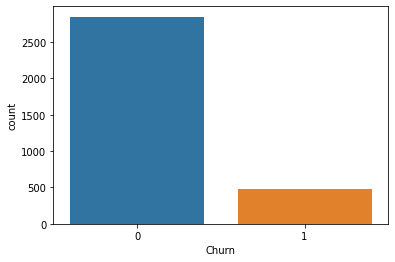

In [8]:
# Our label Distribution (countplot)
sns.countplot(x = "Churn", data = data)
plt.show()

In [9]:
#checking the percentage of class distribution for (balanced or imbalanced)
occ = data.Churn.value_counts()
print(occ / data.shape[0])
#this shows 85% and 14% of class distribution, which i think is not too bad!

0    0.855086
1    0.144914
Name: Churn, dtype: float64


<AxesSubplot:>

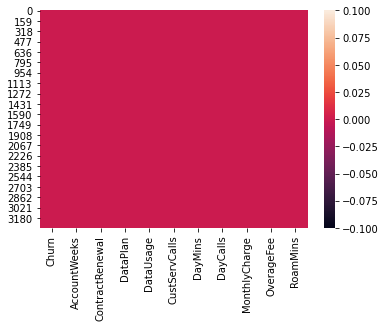

In [10]:
sns.heatmap(data.isnull())

c:\users\c4leb c c\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Churn', ylabel='Density'>

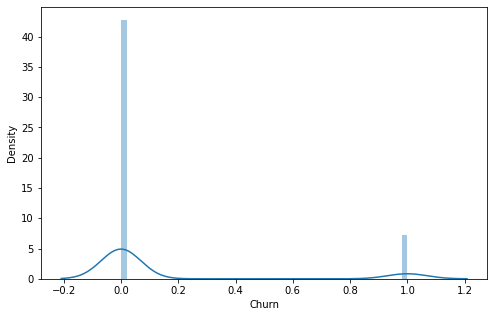

In [74]:
# Example EDA
plt.figure(figsize=(8, 5))
sns.distplot(data["Churn"])

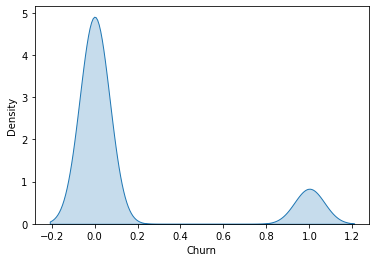

In [12]:
sns.kdeplot(data.Churn, shade=True)
plt.show()

In [133]:
# to check if they exist a non_uniform charaters

clearning_0 = [x for x in data.Churn if x>0]
clearning_1 = [x for x in data.Churn if x<1]
clearning_2 = [x for x in data.AccountWeeks if type(x) !=int]
clearning_3 = [x for x in data.ContractRenewal if type(x) !=int]
clearning_4 = [x for x in data.DataPlan if type(x) !=int]
clearning = [x for x in data.DataUsage  if type(x) !=float]
print(clearning_0,clearning_1,clearning_2,clearning_3,clearning_4)
print(clearning)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [134]:
#checking if they exist a duplicated values

duplicate_values = data.duplicated()
duplicate_values
print(duplicate_values.sum())

0


In [15]:
duplicate_values = [x for x in duplicate_values if x==True ]
duplicate_values #the code shows if they exist a duplcate value in the dataset

[]

we dont really need to do featuer scaling or generating new features
except if we want to improve the performance of logistic regression which are not neccessry in this case
since they are other model that performs good based on my level of understanding

In [71]:
##nowwe declare the dependent and indepent values
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [17]:
#checking iif ther exist a NAN vlaues in the datset
checking = [x for x in data if x=='NAN']
checking

[]

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [18]:
#importing the required model for testing
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#spliting the dataset for testing and training

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [85]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [86]:
model.fit(X_train, Y_train) 

LogisticRegression(max_iter=1000)

In [87]:
model.score(X, Y)

0.8613861386138614

In [88]:
#making predictions

In [92]:
predictions = model.predict(X_test)

In [93]:
#using confussion metrics to show the report/model performance

In [94]:
classification_report(Y_test, predictions)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.60      0.20      0.29       143

    accuracy                           0.87      1000
   macro avg       0.74      0.59      0.61      1000
weighted avg       0.84      0.87      0.84      1000



In [65]:
confusion_matrix(Y_test, predictions)

array([[838,  19],
       [115,  28]], dtype=int64)

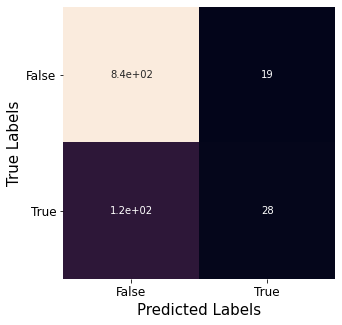

In [144]:
confussion_matrix_map = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(8, 5))
ax =sns.heatmap(confussion_matrix_map, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [42]:
#to check the accuracy of the model

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)
print('Accuracy of the model is: ',accuracy_score(Y_test, predictions))

Accuracy of the model is:  0.856


In [44]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_estimators = 200) #estimators simply means the common values to play with, i.e how many trees in the forest
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)

In [46]:
#lets see how well our model performs
print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       857
           1       0.88      0.64      0.74       143

    accuracy                           0.94      1000
   macro avg       0.91      0.81      0.85      1000
weighted avg       0.93      0.94      0.93      1000



In [47]:
print(confusion_matrix(Y_test, pred_rfc))

[[844  13]
 [ 51  92]]


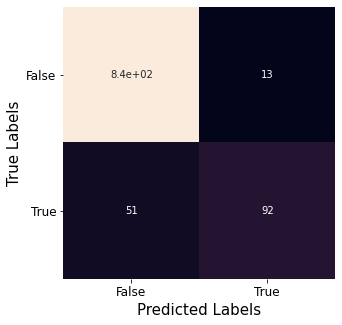

In [142]:
confussion_matrix_map = confusion_matrix(Y_test, pred_rfc)
plt.figure(figsize=(8, 5))
ax =sns.heatmap(confussion_matrix_map, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [125]:
accuracy_score(Y_test, pred_rfc)
print('Accuracy of the model is: ',accuracy_score(Y_test, pred_rfc))

Accuracy of the model is:  0.936


In [107]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

In [109]:
# Create Decision Tree classifer object

dtc = DecisionTreeClassifier() # Train Decision Tree Classifer
dtc = dtc.fit(X_train, Y_train) #Predict the response for test dataset
pred_dtc = dtc.predict(X_test)
confusion_matrix(Y_test, pred_dtc)

array([[789,  68],
       [ 48,  95]], dtype=int64)

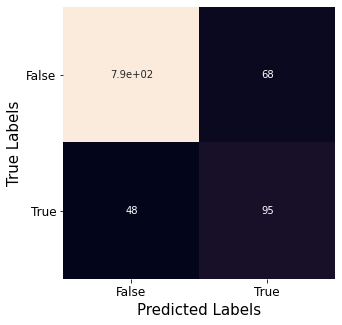

In [143]:
confussion_matrix_map = confusion_matrix(Y_test, pred_dtc)
plt.figure(figsize=(8, 5))
ax =sns.heatmap(confussion_matrix_map, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [110]:
#lets see how well our model performs

print(classification_report(Y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       857
           1       0.58      0.66      0.62       143

    accuracy                           0.88      1000
   macro avg       0.76      0.79      0.78      1000
weighted avg       0.89      0.88      0.89      1000



In [111]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",accuracy_score(Y_test, pred_dtc))

Accuracy: 0.884


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

# Answer for the best performing model

  in my own understanding from my analysis when i mannually calculate
the values gotten from the confuccion matrix for the three algorithms

                LOGISTIC REGRESSION
     i got  array([[838,  19],
                   [115,  28]]
                  838 true positives
                  28true negatives
                  115 false positives
                  19 false negtives
                  (838+28)/(838+19+115+28) = 86.6% acurate
                  
                  DESCISION TREE
     i got  array([[789,  68],
                   [ 48,  95]],
                  789 true positives
                  95 true negatives
                  48 false positives
                  68 false negtives
                  (789+95)/(789+68+115+95) = 88.4% acurate
                  
                  RANDOM FOREST CLASSIFIER
     i got   array( [[844  13]
                    [ 51  92]]
                  844 true positives
                  92 true negatives
                  51 false positives
                  13 false negtives
                  (844+92)/(844+92+51+13) = 93.6% acurate
                   
                   
from the above its clear that Random Forest Classifier 
has the highest Values of 
1) `TRUE POSITIVE`  (2)`TRUE NEGATVES`  (3)`CLASSIFICSTION REPORT` (   precision, recall, f1-score, and support)

and i can say based on my level of understanding in the field of ML, that is the BEST PERFORMED MODEL
                   

# how i can improve the performance of other module


(1) SCALING THE DATA

(2) GENERATING NEW FEATURE

to properly balance the data can as well improve the performance of

LOGISTIC REGRESSION etc.